In [1]:
import gensim
import os, math
import numpy as np
import pandas as pd
import seaborn as sns
import helpers
%matplotlib inline
import matplotlib.pyplot as plt
#from sklearn.feature_extraction.text import TfidfVectorizer
from w2v import W2vVectorizer, W2vClassifier

In [2]:
X_train,y_train = helpers.get_1st_layer_data('./data/training_variants', './data/training_text')
items = [2776, 2060, 732, 1839]
X_train = X_train.Text
y_train = y_train.Class
w2v = W2vVectorizer(100)
w2v.fit(X_train)

In [3]:
c = W2vClassifier(w2v)
c.fit(X_train, y_train, tfidf=True)

0
500
1000
1500
2000


In [4]:
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import log_loss

X = c.X_train
clf = OneVsRestClassifier(svm.SVC(C=1.0, kernel='linear', probability=True,
                                 random_state=0, class_weight='balanced'))
y_train_bi = c.onehot(y_train)
clf.fit(X, y_train_bi)
y_train_prob = clf.predict_proba(X)
for i in range(y_train_prob.shape[0]):
    y_train_prob[i] = y_train_prob[i]/np.sum(y_train_prob[i])
print(c.logloss(y_train, y_train_prob))

1.58465809643


In [ ]:
log_loss?

In [19]:
import sklearn.decomposition as dcmp
pca = dcmp.PCA(n_components=20)
pca.fit(X)
Xreduced = pca.transform(X)

clf = OneVsRestClassifier(svm.SVC(C=1.0, kernel='linear', probability=True,
                                 random_state=0, class_weight='balanced'))
y_train_bi = c.onehot(y_train)
clf.fit(Xreduced, y_train_bi)
y_train_prob = clf.predict_proba(Xreduced)
for i in range(y_train_prob.shape[0]):
    y_train_prob[i] = y_train_prob[i]/np.sum(y_train_prob[i])
print(c.logloss(y_train, y_train_prob))

1.94022067452


In [13]:
clf_notf = W2vClassifier(w2v)
clf_notf.fit(X_train, y_train, tfidf=False)

0
500
1000
1500
2000


In [25]:
X_notf = clf_notf.X_train
p_notf = clf_notf.predict(X_notf)
clf_notf.logloss(y_train, p_notf)
#p_notf[150,:]
np.log2(p_notf[0,:])

array([-3.19244342, -3.0563039 , -3.20778469, -3.10776285, -3.50422472,
       -3.64655801, -2.94548018, -3.02393552, -2.99516079])

In [11]:
def predict(X, ctr):
    p = np.zeros((X.shape[0], 9))
    for n in range(X.shape[0]):
        d = np.zeros(9)
        for i in range(9):
            d[i] = np.linalg.norm(X[n,:] - ctr[i,:])
        d = d/np.linalg.norm(d)
        p[n,:] = d
    return p

def onehot(y):
    output = np.zeros((len(y), 9))
    for i,n in enumerate(y):
        output[i,n-1]=1
    return output

def logloss(y, X):
    N = X.shape[0]
    x = 0
    for i in range(N):
        x+= np.dot(y[i,:], np.log2(X[i,:]))
    x = (-1./N)*x
    return x

from sklearn.neighbors.nearest_centroid import NearestCentroid
c = NearestCentroid()
c.fit(X, y_train)
centroids = c.centroids_


In [17]:
w2v.doc2vec(X_train[2776], tfidf=False)

array([-0.16672715,  0.25744363, -0.42377448,  0.26536373, -0.62897261,
       -0.26353329,  0.80095657,  0.30173567,  0.13773757, -0.10799293,
       -0.02260212,  1.24072738, -0.10159008,  0.38701266, -0.31329377,
       -0.35711027,  0.77338455,  0.43810271,  0.73211481,  0.93856294,
       -0.31030487,  1.11919873,  0.42846298,  0.2530371 , -0.6827164 ,
       -0.08861157, -0.27281188,  0.60802126,  0.32148301, -0.46341217,
       -0.19626264,  0.16682749,  0.98040099,  0.22487089,  0.6447319 ,
       -0.16043369,  0.63235187, -0.15444313, -0.8693384 ,  0.44117362,
       -0.72841232,  0.68456727, -0.55836042, -0.26147683,  0.84621823,
       -0.8939317 ,  0.67219753,  1.11184505, -0.30801649,  0.89921412,
       -1.44102145, -0.68769905, -0.48858732,  0.57803893, -1.17605869,
        0.61256433, -1.16603563, -1.2269977 ,  0.35139778,  0.45409314,
        0.47698525,  0.48804571, -0.16866079,  0.82144682,  1.57992544,
        0.4030514 ,  1.06988247, -1.33053118,  0.02603815,  0.80

In [8]:
X[0,:]

array([ -612.69074405,   884.63641779,   188.11441896,   869.4578879 ,
         236.52169555,  1930.53849845,  -230.35156607, -1419.00583034,
        1592.70161469,   283.66059029,  1400.6125453 ,  -159.68268552,
         633.82045676,   630.56416987,   102.35052067, -1058.10049467,
       -1049.82007331,   517.35671474,  1189.86829748,  1312.06203883,
        1411.39229163, -1077.88805156,  1495.58262442,  -110.62999665,
        1954.54638086, -1471.04007508,  -877.89515971,  -883.8967006 ,
        1594.29385003, -1388.55178019, -1819.76945514, -1996.96231331,
        1178.68351451,  -586.17481024,   718.02217615,  1503.85120194,
        -933.34505058,  -406.76921999,   927.29724791,  -260.72548855,
         674.75931309,  2606.6250046 , -2666.83298149,  1925.74971812,
        1401.11069911,   542.41260616,  -755.90918895,  2642.80687458,
        1384.4640621 ,    41.17923538, -1156.86364584,  2838.03249791,
       -1211.97169885, -2999.68423994, -1427.26741994,  -123.61069282,
      

In [20]:
X.shape

(4, 100)

In [3]:
tfidf = w2v.tfidf

#%timeit tfidf.idf_[tfidf.vocabulary_['brca1']]

In [5]:
tfidf.idf_[tfidf.vocabulary_['the']]

1.0

In [46]:
%timeit tfidf.idf_[0]

254 µs ± 17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [37]:
tfidf.idf_[1]

1.5108256237659907

In [62]:
doc = X_train[2776].lower()
words = doc.split(' ')
v = np.zeros(len(words), dtype=int)
error_indices = np.ones_like(v)
M = np.zeros((len(words), 100))
for i, w in enumerate(words):
    try:
        v[i] = tfidf.vocabulary_[w]
        M[i,:] = w2v.word2vec(w)
    except:
        error_indices[i] = 0
weights = np.log(tfidf.idf_[v])*error_indices
docvector = np.zeros_like(M[0,:])
for i,w in enumerate(words):
    docvector += weights[i]*M[i,:]

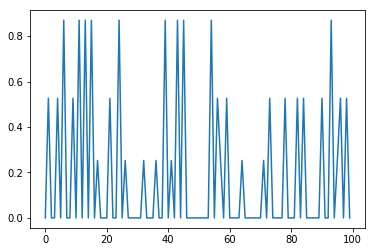

In [45]:
plt.plot(weights[0:100])

In [33]:
tfidf.idf_[-1]

2.3862943611198908

In [6]:
tfidf = TfidfVectorizer(
            min_df=1,strip_accents='unicode',lowercase =True,
            analyzer='word', use_idf=True,
            smooth_idf=False, sublinear_tf=False).fit(X_train.unique())

In [26]:
np.log(tfidf.idf_[tfidf.vocabulary_['white']])

0.52658903413904457

In [9]:
np.log(1.5)

0.40546510810816438

KeyboardInterrupt: 

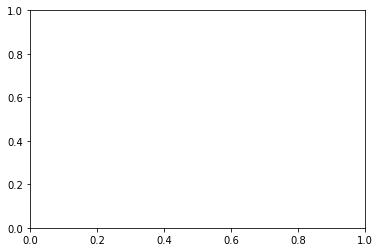

In [51]:
plt.pcolor(M)

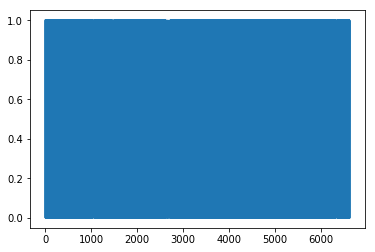

In [59]:
np.mean(error_indices)

0.69138972809667676

In [10]:
clf.centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [4]:
X = c.X_train

In [24]:
np.linalg.norm(X[15,:])

69.903479528294241